In [26]:
!pip install nltk


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
# Titanic Project Notebook

# Step 1: Import libraries
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('wordnet')

# Step 2: Load Titanic dataset
# You can download from seaborn (already available)
import seaborn as sns
titanic = sns.load_dataset('titanic')

print("Dataset Shape:", titanic.shape)
titanic.head()


Dataset Shape: (891, 15)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [29]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download resources (run only once)
nltk.download('stopwords')
nltk.download('wordnet')

class TextCleaner:
    def __init__(self, remove_stopwords=True, lemmatize=True):
        self.stop_words = set(stopwords.words('english'))
        self.lemmatizer = WordNetLemmatizer()
        self.remove_stopwords = remove_stopwords
        self.lemmatize = lemmatize

    def clean(self, text):
        if text is None:
            return ""
        # Lowercase
        text = text.lower()
        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))
        # Remove filler words
        filler_words = ["uh", "um", "like"]
        for fw in filler_words:
            text = text.replace(fw, "")
        # Tokenize
        words = text.split()
        # Remove stopwords
        if self.remove_stopwords:
            words = [w for w in words if w not in self.stop_words]
        # Lemmatize
        if self.lemmatize:
            words = [self.lemmatizer.lemmatize(w) for w in words]
        return " ".join(words)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
# Initialize text cleaner
cleaner = TextCleaner()

# Apply cleaning on 'deck' and 'embarked' columns (example categorical/text data)
titanic['cleaned_embarked'] = titanic['embarked'].astype(str).apply(cleaner.clean)
titanic['cleaned_class'] = titanic['class'].astype(str).apply(cleaner.clean)

titanic[['embarked', 'cleaned_embarked', 'class', 'cleaned_class']].head()


,embarked,cleaned_embarked,class,cleaned_class
0,S,,Third,third
1,C,c,First,first
2,S,,Third,third
3,S,,First,first
4,S,,Third,third


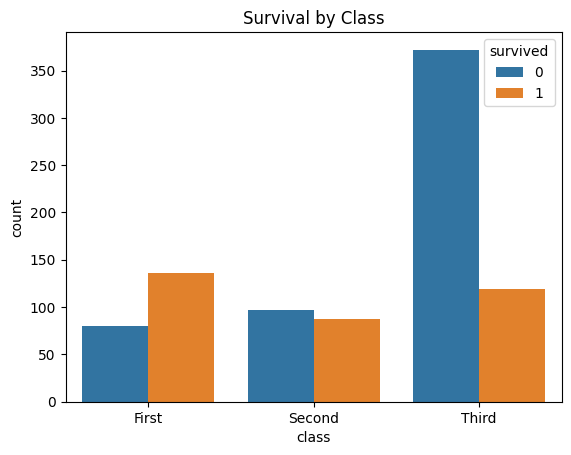

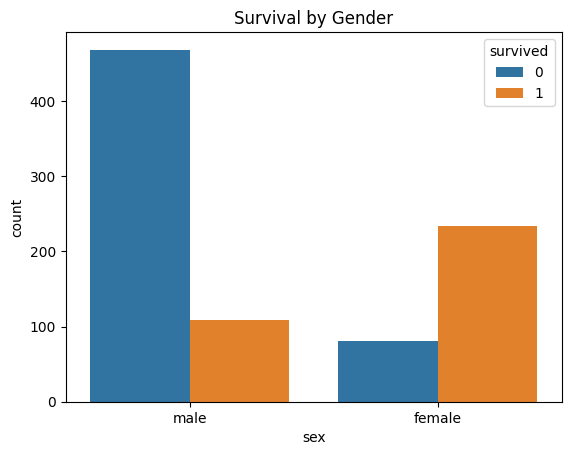

In [31]:
# Simple visualization of survival by class
sns.countplot(x='class', hue='survived', data=titanic)
plt.title("Survival by Class")
plt.show()

# Survival by sex
sns.countplot(x='sex', hue='survived', data=titanic)
plt.title("Survival by Gender")
plt.show()


In [32]:
# Final integrated test - cleaned + visualization
print("Columns after text cleaning:", titanic.columns.tolist())
print("Sample cleaned text from Embarked column:", titanic['cleaned_embarked'].unique()[:10])

Columns after text cleaning: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone', 'cleaned_embarked', 'cleaned_class']
Sample cleaned text from Embarked column: ['' 'c' 'q' 'nan']
